# Support Vector Machines
COMP9417 Major Assignment  
Purpose: Investigate SVMs as a model for the Student Life Dataset  
Author: Andrew Lau

In [1]:
import os
os.getcwd()

'C:\\Users\\andre\\Documents\\GitHub\\COMP9417_major_project'

In [2]:
# globals
CV_FOLDS = 10
N_JOBS = 1

In [3]:
# import modules
import pandas as pd
import numpy as np

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

from matplotlib import pyplot as plt 

import sklearn 
print (sklearn.__version__)
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import log_loss, mean_squared_error
from sklearn.svm import SVC, SVR

import warnings
warnings.simplefilter(action='once', category=FutureWarning)

import helper_functions as helper  # importing custom helper functions
import shap
import pickle

0.20.1


ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

In [4]:
# import data
def import_data(data):    
    return pd.read_csv("train_test_data/" + data + ".csv", index_col="uid").drop("Unnamed: 0", axis="columns")        
X_train = import_data("X_train")
X_test = import_data("X_test")
y_train = import_data("y_train")
y_test = import_data("y_test")

In [5]:
X_train.head()
X_test.head()
y_train.head()
y_test.head()

,panas_pos_raw_pre,panas_neg_raw_pre,flourishing_scale_raw_pre,panas_pos_imp_pre,panas_neg_imp_pre,flourishing_scale_imp_pre,panas_pos_raw_class_pre,panas_neg_raw_class_pre,flourishing_scale_raw_class_pre,panas_pos_imp_class_pre,...,flourishing_scale_raw_post,panas_pos_imp_post,panas_neg_imp_post,flourishing_scale_imp_post,panas_pos_raw_class_post,panas_neg_raw_class_post,flourishing_scale_raw_class_post,panas_pos_imp_class_post,panas_neg_imp_class_post,flourishing_scale_imp_class_post
uid,,,,,,,,,,,,,,,,,,,,,
u03,30.0,27.0,34.0,30.0,27.0,34.0,1.0,1.0,0.0,1.0,...,31.0,25.0,20.0,31.0,0.0,1.0,0.0,0.0,1.0,0.0
u27,23.0,18.0,31.0,23.0,18.0,31.0,0.0,0.0,0.0,0.0,...,31.0,19.0,23.0,31.0,0.0,1.0,0.0,0.0,1.0,0.0
u05,32.0,27.0,48.0,32.0,27.0,48.0,1.0,1.0,1.0,1.0,...,50.0,33.0,17.0,50.0,1.0,0.0,1.0,1.0,0.0,1.0
u43,31.0,18.0,47.0,31.0,18.0,47.0,1.0,0.0,1.0,1.0,...,42.0,32.0,21.0,42.0,1.0,1.0,0.0,1.0,1.0,0.0
u56,22.0,9.0,46.0,22.0,9.0,46.0,0.0,0.0,1.0,0.0,...,48.0,29.0,15.0,48.0,1.0,0.0,1.0,1.0,0.0,1.0


# EDA

In [6]:
y_train.describe()

,panas_pos_raw_pre,panas_neg_raw_pre,flourishing_scale_raw_pre,panas_pos_imp_pre,panas_neg_imp_pre,flourishing_scale_imp_pre,panas_pos_raw_class_pre,panas_neg_raw_class_pre,flourishing_scale_raw_class_pre,panas_pos_imp_class_pre,...,flourishing_scale_raw_post,panas_pos_imp_post,panas_neg_imp_post,flourishing_scale_imp_post,panas_pos_raw_class_post,panas_neg_raw_class_post,flourishing_scale_raw_class_post,panas_pos_imp_class_post,panas_neg_imp_class_post,flourishing_scale_imp_class_post
count,36.000000,34.000000,33.000000,37.000000,37.000000,37.000000,36.000000,34.000000,33.000000,37.000000,...,28.000000,30.000000,30.000000,28.000000,29.000000,30.000000,28.000000,30.000000,30.000000,28.000000
mean,28.500000,19.382353,42.636364,28.513514,19.810811,42.972973,0.527778,0.441176,0.545455,0.540541,...,43.178571,29.600000,21.766667,43.178571,0.517241,0.566667,0.500000,0.533333,0.566667,0.500000
std,6.235841,7.781153,9.266263,6.149172,7.978575,9.114965,0.506309,0.503995,0.505650,0.505228,...,9.412575,6.881259,8.067317,9.412575,0.508548,0.504007,0.509175,0.507416,0.504007,0.509175
min,13.000000,10.000000,15.000000,13.000000,10.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,16.000000,17.000000,11.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,14.000000,41.000000,26.000000,14.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,40.500000,25.250000,15.000000,40.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,17.500000,45.000000,29.000000,18.000000,45.000000,1.000000,0.000000,1.000000,1.000000,...,44.500000,31.000000,20.000000,44.500000,1.000000,1.000000,0.500000,1.000000,1.000000,0.500000
75%,32.250000,21.750000,49.000000,32.000000,25.000000,49.000000,1.000000,1.000000,1.000000,1.000000,...,48.250000,34.000000,27.500000,48.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,42.000000,43.000000,54.000000,42.000000,43.000000,56.000000,1.000000,1.000000,1.000000,1.000000,...,56.000000,43.000000,37.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
y_train.columns

Index(['panas_pos_raw_pre', 'panas_neg_raw_pre', 'flourishing_scale_raw_pre',
       'panas_pos_imp_pre', 'panas_neg_imp_pre', 'flourishing_scale_imp_pre',
       'panas_pos_raw_class_pre', 'panas_neg_raw_class_pre',
       'flourishing_scale_raw_class_pre', 'panas_pos_imp_class_pre',
       'panas_neg_imp_class_pre', 'flourishing_scale_imp_class_pre',
       'panas_pos_raw_post', 'panas_neg_raw_post',
       'flourishing_scale_raw_post', 'panas_pos_imp_post',
       'panas_neg_imp_post', 'flourishing_scale_imp_post',
       'panas_pos_raw_class_post', 'panas_neg_raw_class_post',
       'flourishing_scale_raw_class_post', 'panas_pos_imp_class_post',
       'panas_neg_imp_class_post', 'flourishing_scale_imp_class_post'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018000572B00>]],
      dtype=object)

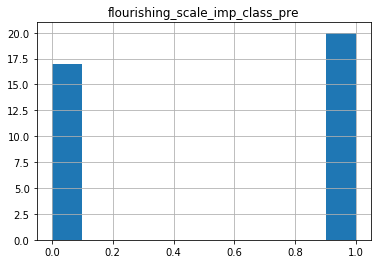

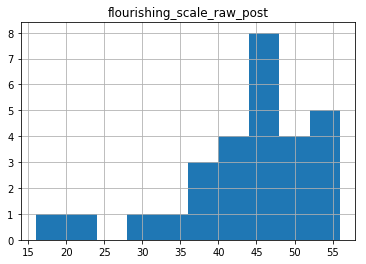

In [8]:
y_train.loc[:, ['flourishing_scale_imp_class_pre']].hist()
y_train.loc[:, ['flourishing_scale_raw_post']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180006C6208>]],
      dtype=object)

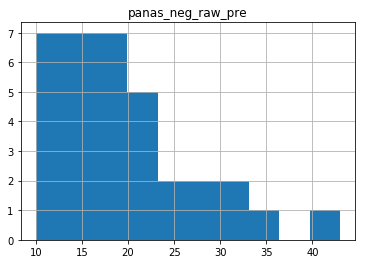

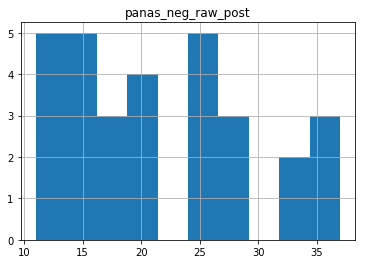

In [9]:
y_train.loc[:, ['panas_neg_raw_pre']].hist()
y_train.loc[:, ['panas_neg_raw_post']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001800076EBA8>]],
      dtype=object)

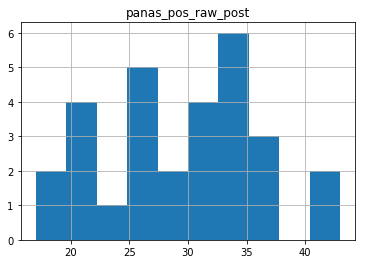

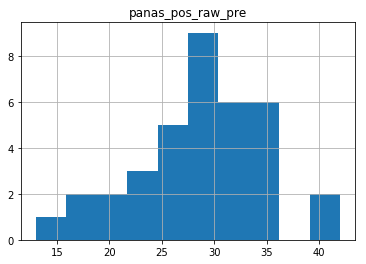

In [10]:
y_train.loc[:, ['panas_pos_raw_post']].hist()
y_train.loc[:, ['panas_pos_raw_pre']].hist()

In [11]:
features_wk_10 = [
    "chargetime_count_wk_10"
    , "chargetime_max_wk_10"
    , "chargetime_mean_wk_10"
    , "chargetime_median_wk_10"
    , "chargetime_min_wk_10"
    , "chargetime_q1_wk_10"
    , "chargetime_q3_wk_10"
    , "activity_stationary_ratio_wk_10"
    , "activity_running_ratio_wk_10"
    , "audio_silent_ratio_wk_10"
    , "audio_noisy_ratio_wk_10"
    , "bluetooth_avg_wk_10"
    , "conversation_hours_wk_10"
    , "conversation_freq_wk_10"
    , "speed_mean_wk_10"
    , "speed_max_wk_10"
    , "speed_sd_wk_10"
    , "travelstate_time_stationary_wk_10"
    , "travelstate_time_moving_wk_10"
    , "outdoor_time_wk_10"
    , "indoor_time_wk_10"
    , "indoor_dist_wk_10"
    , "outdoors_dist_wk_10"
    , "altitude_mean_wk_10"
    , "altitude_sd_wk_10"
    , "altitude_max_wk_10"
    , "altitude_min_wk_10"
    , "location_count_wk_10"
    , "location_1_time_wk_10"
    , "location_2_time_wk_10"
    , "location_3_time_wk_10"
    , "location_4_time_wk_10"
    , "location_5_time_wk_10"
    , "bearing_north_time_wk_10"
    , "bearing_east_time_wk_10"
    , "bearing_south_time_wk_10"
    , "bearing_west_time_wk_10"
    , "sleep_max_wk_10"
    , "sleep_mean_wk_10"
    , "sleep_med_wk_10"
    , "sleep_min_wk_10"
    , "locktime_count_wk_10"
    , "locktime_max_wk_10"
    , "locktime_mean_wk_10"
    , "locktime_median_wk_10"
    , "locktime_min_wk_10"
    , "locktime_q1_wk_10"
    , "locktime_q3_wk_10"
]
features_wk_9_10 = [
    "chargetime_count_wk_9"
    , "chargetime_max_wk_9"
    , "chargetime_mean_wk_9"
    , "chargetime_median_wk_9"
    , "chargetime_min_wk_9"
    , "chargetime_q1_wk_9"
    , "chargetime_q3_wk_9"
    , "activity_stationary_ratio_wk_9"
    , "activity_running_ratio_wk_9"
    , "audio_silent_ratio_wk_9"
    , "audio_noisy_ratio_wk_9"
    , "bluetooth_avg_wk_9"
    , "conversation_hours_wk_9"
    , "conversation_freq_wk_9"
    , "speed_mean_wk_9"
    , "speed_max_wk_9"
    , "speed_sd_wk_9"
    , "travelstate_time_stationary_wk_9"
    , "travelstate_time_moving_wk_9"
    , "outdoor_time_wk_9"
    , "indoor_time_wk_9"
    , "indoor_dist_wk_9"
    , "outdoors_dist_wk_9"
    , "altitude_mean_wk_9"
    , "altitude_sd_wk_9"
    , "altitude_max_wk_9"
    , "altitude_min_wk_9"
    , "location_count_wk_9"
    , "location_1_time_wk_9"
    , "location_2_time_wk_9"
    , "location_3_time_wk_9"
    , "location_4_time_wk_9"
    , "location_5_time_wk_9"
    , "bearing_north_time_wk_9"
    , "bearing_east_time_wk_9"
    , "bearing_south_time_wk_9"
    , "bearing_west_time_wk_9"
    , "sleep_max_wk_9"
    , "sleep_mean_wk_9"
    , "sleep_med_wk_9"
    , "sleep_min_wk_9"
    , "locktime_count_wk_9"
    , "locktime_max_wk_9"
    , "locktime_mean_wk_9"
    , "locktime_median_wk_9"
    , "locktime_min_wk_9"
    , "locktime_q1_wk_9"
    , "locktime_q3_wk_9"
]
features_wk_9_10.extend(features_wk_10)

In [12]:
features_wk_9_10_ind = [X_train.columns.get_loc(c) for c in features_wk_9_10]
features_wk_10_ind = [X_train.columns.get_loc(c) for c in features_wk_10]

# SVMs
Only post targets considered.
grid search across
* PCA % variance retained
* all SVM hyperparameters

^ create a function that does this and repeat for all targets

In [13]:
# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    """
    Allows selection of subsets of features in a SKLearn Pipeline object.
    Adapted from "Hands-On Machine learning with Sciki-Learn and TensorFlow by Geron"
    TransformerMixIn that allows selection of features
    """
    def __init__(self, attribute_names="all"):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.attribute_names == "all":
            return X            
        if self.attribute_names == "wk_9_10":            
            return np.array(X)[:,features_wk_9_10_ind]            
        if self.attribute_names == "wk_10":
            return np.array(X)[:,features_wk_10_ind]            

In [15]:
def grid_search(estimator, param_grid, target, scoring, n_iter=50, cv=10, n_jobs=8, n_top=3, verbose=True):
    print("*" * 20, target, "*" * 20)
    df_selector = DataFrameSelector()
    imputer = SimpleImputer()
    scaler = StandardScaler()
    pca = PCA()
    pipe = Pipeline(steps=[('df_selector', df_selector), ('imputer', imputer), ('scaler', scaler),
                           ('pca', pca), ('SVM', estimator)])

    # train using only labelled data
    target_not_null = np.logical_not(y_train.loc[:, target].isnull())

    # run randomized search
    search = RandomizedSearchCV(pipe, param_grid,
                                       n_iter=n_iter, 
                          cv=cv, iid=False, n_jobs=n_jobs, scoring=scoring)
    search.fit(X_train[target_not_null], y_train[target_not_null].loc[:, target])

    # print results
    if verbose:
        report(search.cv_results_, n_top=n_top) 
    return search  

In [19]:
N_ITER = 10_000
N_JOBS = 8
# whilst the results may not converge, further iterations yield little benefit compared to testing out another hyper-parameter
MAX_ITER = 5000  

param_grid = {
    "df_selector__attribute_names":["all", "wk_9_10", "wk_10"],
    "imputer__strategy":["most_frequent", "mean", "median"],    
    "pca__n_components": [0.6, 0.7, 0.8, 0.85, 0.9, 0.95],  # proportion of total variation
    "SVM__C": [0.01, 0.1, 1, 10, 100, 1000],
    "SVM__kernel": ["linear", "rbf", "poly"],
    "SVM__gamma": [0.01, 0.1, 1, 10, 100],
    "SVM__degree": [2, 3, 4, 5, 6]
}

In [16]:
# N_ITER = 10_000
# N_JOBS = 8
# MAX_ITER = 5000

# param_grid = {
#     "df_selector__attribute_names":["all", "wk_9_10", "wk_10"],
#     "imputer__strategy":["most_frequent", "mean", "median"],    
#     "pca__n_components": [0.6, 0.7, 0.8, 0.85, 0.9, 0.95],  # proportion of total variation
#     "SVM__C": [0.01, 0.1, 1, 10, 100, 1000],
#     "SVM__kernel": ["linear", "rbf", "poly"],
#     "SVM__gamma": [0.01, 0.1, 1, 10, 100],
#     "SVM__degree": [2, 3, 4, 5, 6]
# }

# # flourishing - imputed
# flourishing_scale_imp_class_post = grid_search(SVC(max_iter=MAX_ITER, probability=True), param_grid,
#                                      "flourishing_scale_imp_class_post", "neg_log_loss", n_jobs=N_JOBS, n_iter=N_ITER)
# flourishing_scale_imp_post = grid_search(SVR(max_iter=MAX_ITER), param_grid,
#                                "flourishing_scale_imp_post", "neg_mean_squared_error", n_jobs=N_JOBS, n_iter=N_ITER)
# pickle.dump(flourishing_scale_imp_class_post, open('results/SVM/flourishing_scale_imp_class_post.sklearnmodel', 'wb'))
# pickle.dump(flourishing_scale_imp_post, open('results/SVM/flourishing_scale_imp_post.sklearnmodel', 'wb'))

In [20]:
# # flourishing - raw
# flourishing_scale_raw_class_post = grid_search(SVC(max_iter=MAX_ITER, probability=True), param_grid,
#                                      "flourishing_scale_raw_class_post", "neg_log_loss", n_jobs=N_JOBS, n_iter=N_ITER)
# flourishing_scale_raw_post = grid_search(SVR(max_iter=MAX_ITER), param_grid,
#                                "flourishing_scale_raw_post", "neg_mean_squared_error", n_jobs=N_JOBS, n_iter=N_ITER)
# pickle.dump(flourishing_scale_raw_class_post, open('results/SVM/flourishing_scale_raw_class_post.sklearnmodel', 'wb'))
# pickle.dump(flourishing_scale_raw_post, open('results/SVM/flourishing_scale_raw_post.sklearnmodel', 'wb'))

******************** flourishing_scale_raw_class_post ********************
Model with rank: 1
Mean validation score: -0.510 (std: 0.143)
Parameters: {'pca__n_components': 0.95, 'imputer__strategy': 'median', 'df_selector__attribute_names': 'wk_10', 'SVM__kernel': 'poly', 'SVM__gamma': 0.01, 'SVM__degree': 4, 'SVM__C': 1000}

Model with rank: 2
Mean validation score: -0.559 (std: 0.127)
Parameters: {'pca__n_components': 0.6, 'imputer__strategy': 'most_frequent', 'df_selector__attribute_names': 'wk_10', 'SVM__kernel': 'linear', 'SVM__gamma': 0.1, 'SVM__degree': 4, 'SVM__C': 1}

Model with rank: 3
Mean validation score: -0.564 (std: 0.149)
Parameters: {'pca__n_components': 0.9, 'imputer__strategy': 'most_frequent', 'df_selector__attribute_names': 'wk_9_10', 'SVM__kernel': 'linear', 'SVM__gamma': 0.1, 'SVM__degree': 2, 'SVM__C': 0.1}

******************** flourishing_scale_raw_post ********************
Model with rank: 1
Mean validation score: -76.716 (std: 74.416)
Parameters: {'pca__n_com

In [17]:
# # panas - imp
# panas_pos_imp_class_post = grid_search(SVC(max_iter=MAX_ITER, probability=True), param_grid,
#                                      "panas_pos_imp_class_post", "neg_log_loss", n_jobs=N_JOBS, n_iter=N_ITER)
# panas_pos_imp_post = grid_search(SVR(max_iter=MAX_ITER), param_grid,
#                                "panas_pos_imp_post", "neg_mean_squared_error", n_jobs=N_JOBS, n_iter=N_ITER)
# panas_neg_imp_class_post = grid_search(SVC(max_iter=MAX_ITER, probability=True), param_grid,
#                                      "panas_neg_imp_class_post", "neg_log_loss", n_jobs=N_JOBS, n_iter=N_ITER)
# panas_neg_imp_post = grid_search(SVR(max_iter=MAX_ITER), param_grid,
#                                "panas_neg_imp_post", "neg_mean_squared_error", n_jobs=N_JOBS, n_iter=N_ITER)
# pickle.dump(panas_pos_imp_class_post, open('results/SVM/panas_pos_imp_class_post.sklearnmodel', 'wb'))
# pickle.dump(panas_pos_imp_post, open('results/SVM/panas_pos_imp_post.sklearnmodel', 'wb'))
# pickle.dump(panas_neg_imp_class_post, open('results/SVM/panas_neg_imp_class_post.sklearnmodel', 'wb'))
# pickle.dump(panas_neg_imp_post, open('results/SVM/panas_neg_imp_post.sklearnmodel', 'wb'))

In [21]:
# # panas
# panas_pos_raw_class_post = grid_search(SVC(max_iter=MAX_ITER, probability=True), param_grid,
#                                      "panas_pos_raw_class_post", "neg_log_loss", n_jobs=N_JOBS, n_iter=N_ITER)
# panas_pos_raw_post = grid_search(SVR(max_iter=MAX_ITER), param_grid,
#                                "panas_pos_raw_post", "neg_mean_squared_error", n_jobs=N_JOBS, n_iter=N_ITER)
# panas_neg_raw_class_post = grid_search(SVC(max_iter=MAX_ITER, probability=True), param_grid,
#                                      "panas_neg_raw_class_post", "neg_log_loss", n_jobs=N_JOBS, n_iter=N_ITER)
# panas_neg_raw_post = grid_search(SVR(max_iter=MAX_ITER), param_grid,
#                                "panas_neg_raw_post", "neg_mean_squared_error", n_jobs=N_JOBS, n_iter=N_ITER)
# pickle.dump(panas_pos_raw_class_post, open('results/SVM/panas_pos_raw_class_post.sklearnmodel', 'wb'))
# pickle.dump(panas_pos_raw_post, open('results/SVM/panas_pos_raw_post.sklearnmodel', 'wb'))
# pickle.dump(panas_neg_raw_class_post, open('results/SVM/panas_neg_raw_class_post.sklearnmodel', 'wb'))
# pickle.dump(panas_neg_raw_post, open('results/SVM/panas_neg_raw_post.sklearnmodel', 'wb'))

******************** panas_pos_raw_class_post ********************
Model with rank: 1
Mean validation score: -0.565 (std: 0.136)
Parameters: {'pca__n_components': 0.95, 'imputer__strategy': 'most_frequent', 'df_selector__attribute_names': 'wk_10', 'SVM__kernel': 'rbf', 'SVM__gamma': 100, 'SVM__degree': 6, 'SVM__C': 10}

Model with rank: 2
Mean validation score: -0.568 (std: 0.192)
Parameters: {'pca__n_components': 0.85, 'imputer__strategy': 'most_frequent', 'df_selector__attribute_names': 'wk_10', 'SVM__kernel': 'poly', 'SVM__gamma': 10, 'SVM__degree': 5, 'SVM__C': 100}

Model with rank: 3
Mean validation score: -0.569 (std: 0.132)
Parameters: {'pca__n_components': 0.6, 'imputer__strategy': 'median', 'df_selector__attribute_names': 'wk_10', 'SVM__kernel': 'rbf', 'SVM__gamma': 100, 'SVM__degree': 2, 'SVM__C': 1000}

******************** panas_pos_raw_post ********************
Model with rank: 1
Mean validation score: -42.028 (std: 26.759)
Parameters: {'pca__n_components': 0.7, 'imputer_

In [18]:
# load pickled models - imputed
flourishing_scale_imp_class_post = pickle.load(open('results/SVM/flourishing_scale_imp_class_post.sklearnmodel', 'rb'))
flourishing_scale_imp_post = pickle.load(open('results/SVM/flourishing_scale_imp_post.sklearnmodel', 'rb'))
panas_pos_imp_class_post = pickle.load(open('results/SVM/panas_pos_imp_class_post.sklearnmodel', 'rb'))
panas_pos_imp_post = pickle.load(open('results/SVM/panas_pos_imp_post.sklearnmodel', 'rb'))
panas_neg_imp_class_post = pickle.load(open('results/SVM/panas_neg_imp_class_post.sklearnmodel', 'rb'))
panas_neg_imp_post = pickle.load(open('results/SVM/panas_neg_imp_post.sklearnmodel', 'rb'))

In [ ]:
# load pickled models - raw
flourishing_scale_raw_class_post = pickle.load(open('results/SVM/flourishing_scale_raw_class_post.sklearnmodel', 'rb'))
flourishing_scale_raw_post = pickle.load(open('results/SVM/flourishing_scale_raw_post.sklearnmodel', 'rb'))
panas_pos_raw_class_post = pickle.load(open('results/SVM/panas_pos_raw_class_post.sklearnmodel', 'rb'))
panas_pos_raw_post = pickle.load(open('results/SVM/panas_pos_raw_post.sklearnmodel', 'rb'))
panas_neg_raw_class_post = pickle.load(open('results/SVM/panas_neg_raw_class_post.sklearnmodel', 'rb'))
panas_neg_raw_post = pickle.load(open('results/SVM/panas_neg_raw_post.sklearnmodel', 'rb'))

In [76]:
# functions to output results
def output_results_df(cv_results, cols_keep, target):    
    pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)[cols_keep].to_csv(OUTPATH_RESULTS + target + ".csv")
    
def output_results_diagnostics(estimator, target, X_train, y_train, X_test, y_test, quantiles=5, classifier=False, metric_name="Score"):
    target_train_not_null = np.logical_not(y_train.loc[:, target].isnull())
    y_train_actual = y_train[target_train_not_null].loc[:, target]
    y_train_pred = estimator.predict(X_train[target_train_not_null])

    target_test_not_null = np.logical_not(y_test.loc[:, target].isnull())
    y_test_actual = y_test[target_test_not_null].loc[:, target]
    y_test_pred = estimator.predict(X_test[target_test_not_null])
    
    if classifier:
        y_train_pred_proba = estimator.predict_proba(X_train[target_train_not_null])[:,1]
        y_test_pred_proba = estimator.predict_proba(X_test[target_test_not_null])[:,1]  
        score_train = log_loss(y_train_actual, y_train_pred_proba)
        score_test = log_loss(y_test_actual, y_test_pred_proba)
        metric_name = "Log Loss"
    else:
        score_train = mean_squared_error(y_train_actual, y_train_pred)
        score_test = mean_squared_error(y_test_actual, y_test_pred)      
        metric_name = "MSE"

    helper.quantile_plot(y_train_actual, y_train_pred, quantiles=quantiles, title=metric_name + " train: {:.4f}".format(score_train))
    plt.savefig(OUTPATH_RESULTS + target + "_pvo_train.png")

    helper.quantile_plot(y_test_actual, y_test_pred, quantiles=quantiles, title=metric_name + " test: {:.4f}".format(score_test))
    plt.savefig(OUTPATH_RESULTS + target + "_pvo_test.png")

    if classifier:
        helper.lorenz_curve(y_train_actual, y_train_pred_proba)
        plt.savefig(OUTPATH_RESULTS + target + "_lorenz_train.png")
        helper.lorenz_curve(y_test_actual, y_test_pred_proba)   
        plt.savefig(OUTPATH_RESULTS + target + "_lorenz_test.png")
    else:
        helper.lorenz_curve(y_train_actual, y_train_pred)
        plt.savefig(OUTPATH_RESULTS + target + "_lorenz_train.png")
        helper.lorenz_curve(y_test_actual, y_test_pred)   
        plt.savefig(OUTPATH_RESULTS + target + "_lorenz_test.png")

def output_results_shap(estimator, target, X, corr_thresh=0.3):
    shap_values = shap.KernelExplainer(estimator.predict, X).shap_values(X)
    shap.summary_plot(shap_values, X_train, plot_type="bar", show=False, max_display=10, color="orange")
    plt.savefig(OUTPATH_RESULTS + target + "_shap_bar.png", bbox_inches='tight')
    shap.summary_plot(shap_values, X_train, show=False, max_display=10)
    plt.savefig(OUTPATH_RESULTS + target + "_shap.png", bbox_inches='tight')

def output_results(estimator, cv_results, target, X_train, y_train, X_test, y_test, cols_keep, quantiles, classifier=False,
                  metric_name="Score"):
    plt.clf()
    output_results_df(cv_results, cols_keep, target)
    plt.clf()
    output_results_diagnostics(estimator, target, X_train, y_train, X_test, y_test, classifier=classifier, quantiles=quantiles,
                              metric_name=metric_name)
    plt.clf()
    output_results_shap(estimator, target, X_train)
    plt.clf()

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\util

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\util

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\util

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\util

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\util

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\util

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

<Figure size 432x288 with 0 Axes>

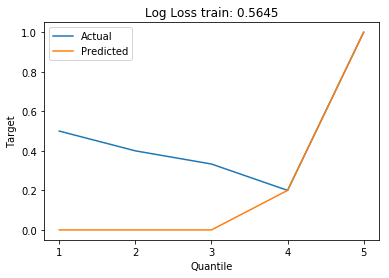

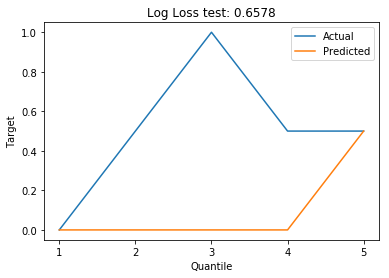

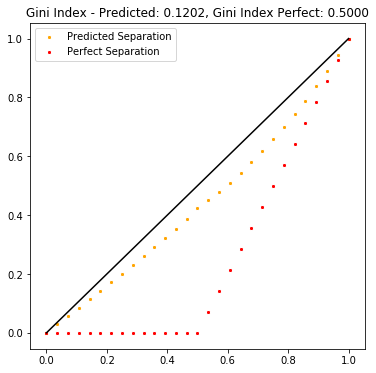

<Figure size 576x396 with 0 Axes>

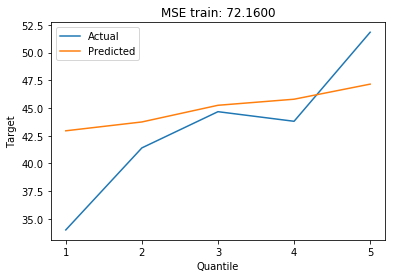

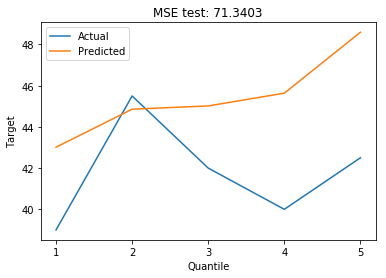

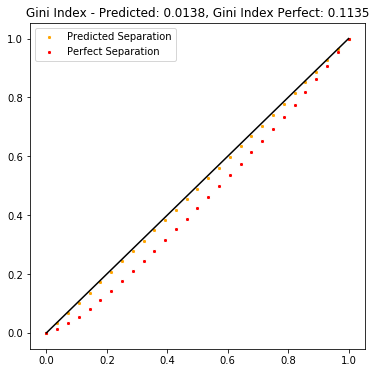

<Figure size 576x396 with 0 Axes>

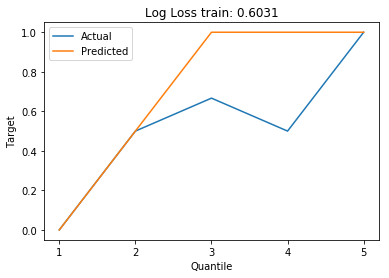

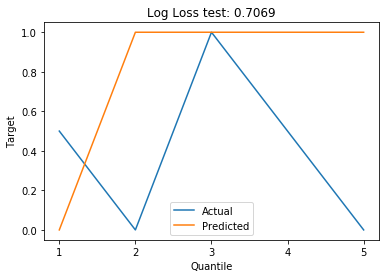

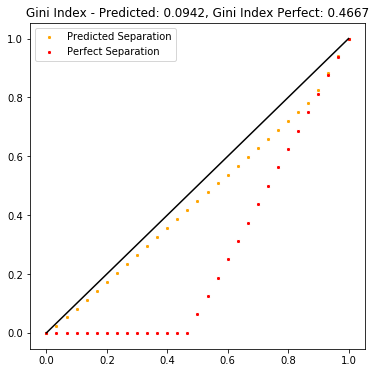

<Figure size 576x396 with 0 Axes>

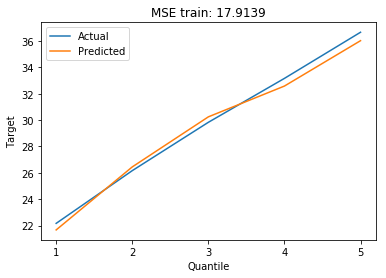

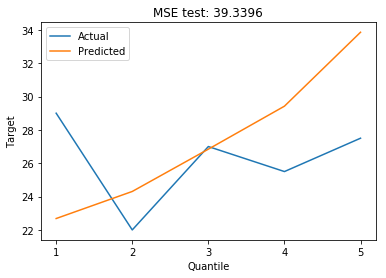

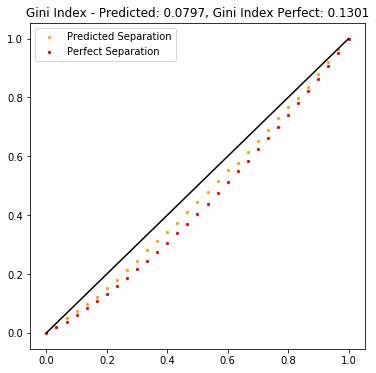

<Figure size 576x396 with 0 Axes>

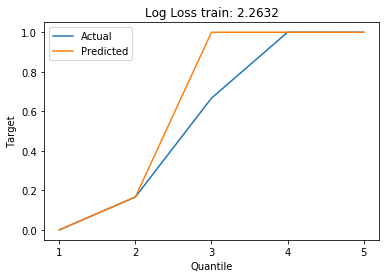

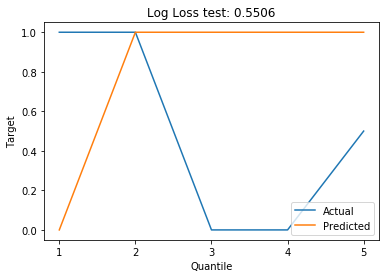

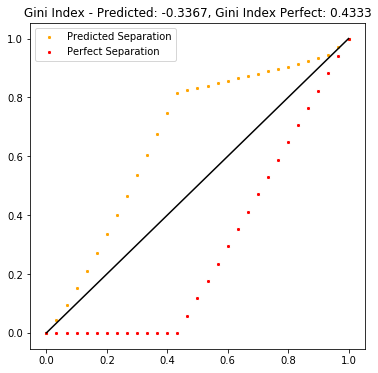

<Figure size 576x396 with 0 Axes>

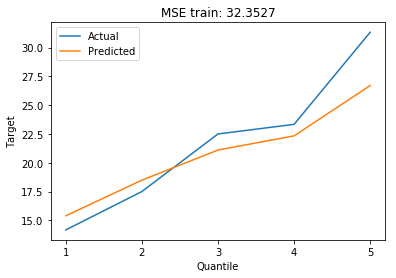

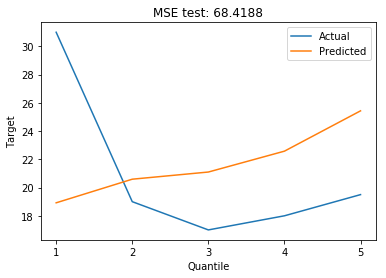

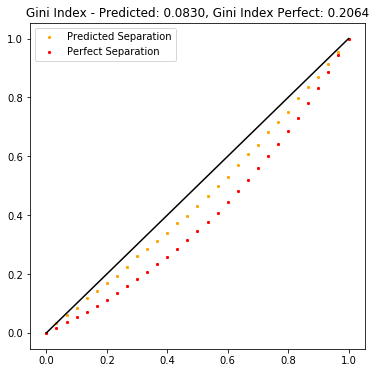

<Figure size 576x396 with 0 Axes>

In [77]:
# produce outputs
%%capture # silence
OUTPATH_RESULTS = "results/SVM/"
COLS_KEEP = ['rank_test_score', 'mean_test_score', 'std_test_score', 'param_pca__n_components', 'param_imputer__strategy',
       'param_df_selector__attribute_names', 'param_SVM__kernel', 'param_SVM__gamma', 'param_SVM__degree', 'param_SVM__C']

output_results(flourishing_scale_imp_class_post, flourishing_scale_imp_class_post.cv_results_, 
               "flourishing_scale_imp_class_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5, classifier=True)
output_results(flourishing_scale_imp_post , flourishing_scale_imp_post.cv_results_,
               "flourishing_scale_imp_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5)
output_results(panas_pos_imp_class_post , panas_pos_imp_class_post.cv_results_,
               "panas_pos_imp_class_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5, classifier=True)
output_results(panas_pos_imp_post, panas_pos_imp_post.cv_results_,
               "panas_pos_imp_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5)
output_results(panas_neg_imp_class_post , panas_neg_imp_class_post.cv_results_,
               "panas_neg_imp_class_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5, classifier=True)
output_results(panas_neg_imp_post, panas_neg_imp_post.cv_results_,
               "panas_neg_imp_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5)

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\util

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\util

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\util

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\util

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\util

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\util

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

<Figure size 432x288 with 0 Axes>

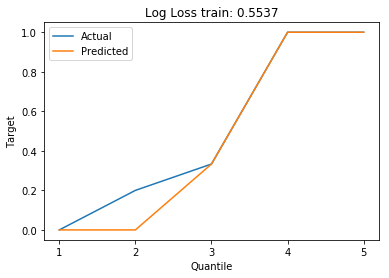

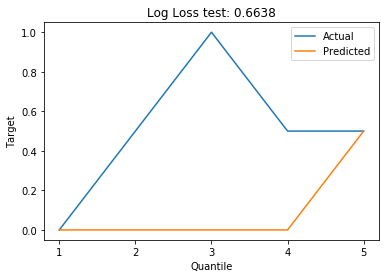

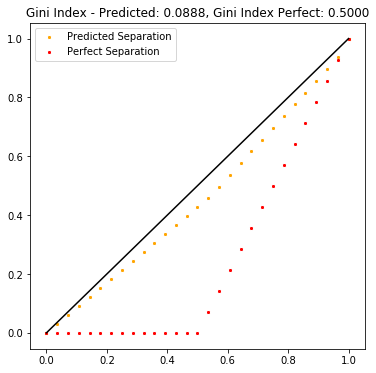

<Figure size 576x396 with 0 Axes>

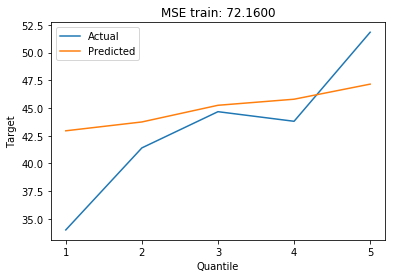

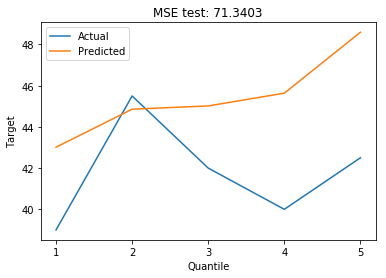

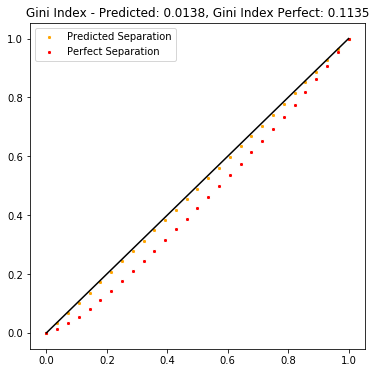

<Figure size 576x396 with 0 Axes>

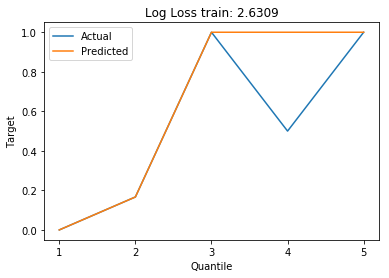

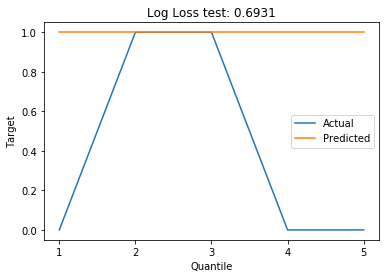

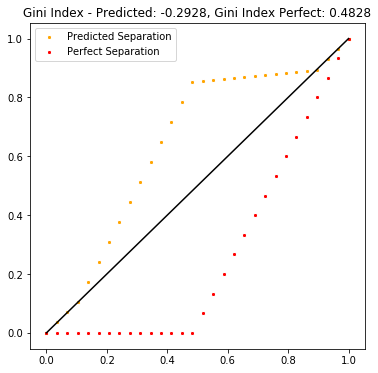

<Figure size 576x396 with 0 Axes>

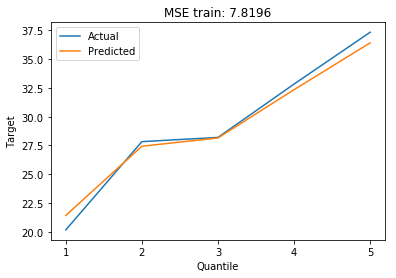

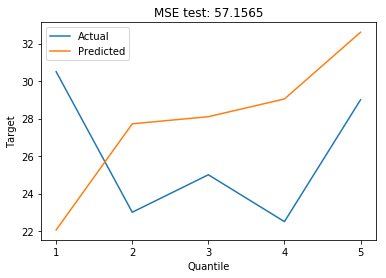

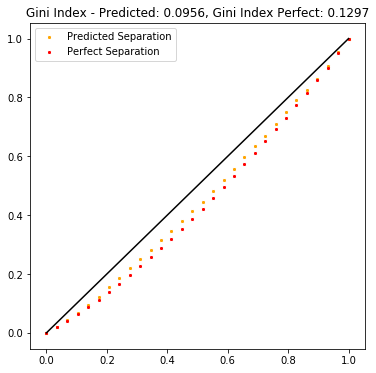

<Figure size 576x396 with 0 Axes>

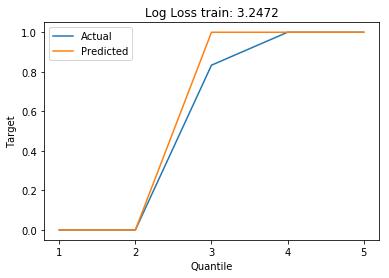

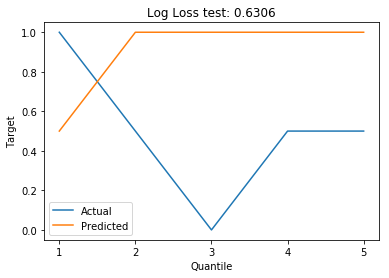

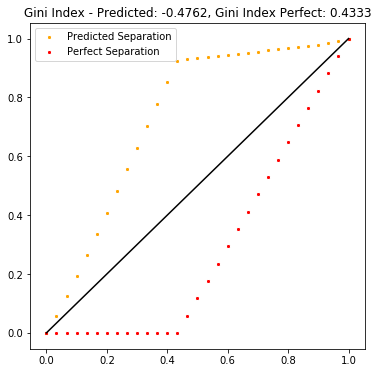

<Figure size 576x396 with 0 Axes>

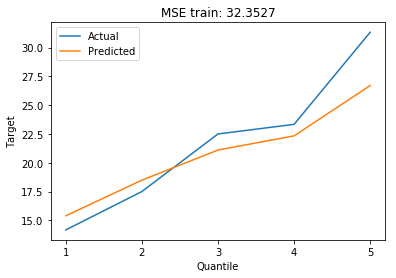

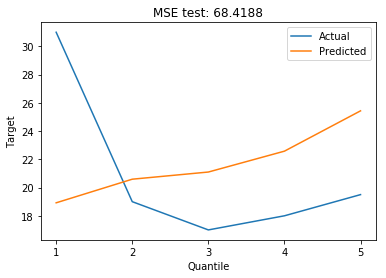

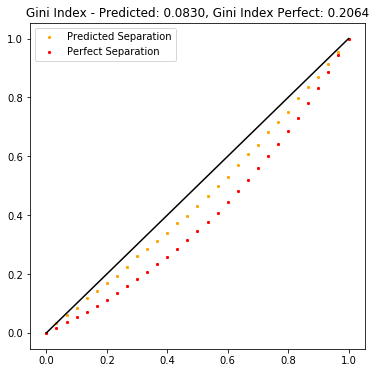

<Figure size 576x396 with 0 Axes>

In [78]:
%%capture # silence
output_results(flourishing_scale_raw_class_post, flourishing_scale_raw_class_post.cv_results_, 
               "flourishing_scale_raw_class_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5, classifier=True)
output_results(flourishing_scale_raw_post , flourishing_scale_raw_post.cv_results_,
               "flourishing_scale_raw_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5)
output_results(panas_pos_raw_class_post , panas_pos_raw_class_post.cv_results_,
               "panas_pos_raw_class_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5, classifier=True)
output_results(panas_pos_raw_post, panas_pos_raw_post.cv_results_,
               "panas_pos_raw_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5)
output_results(panas_neg_raw_class_post , panas_neg_raw_class_post.cv_results_,
               "panas_neg_raw_class_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5, classifier=True)
output_results(panas_neg_raw_post, panas_neg_raw_post.cv_results_,
               "panas_neg_raw_post", X_train, y_train, X_test, y_test, COLS_KEEP, 5)

In [128]:
df["CV score (mean)"]

KeyError: 'CV score (mean)'

In [136]:
def combine_imp_raw_results(raw_cv_results, imp_cv_results, fpath_out):
    """
    takes the cv results from the randomised grid search object from the raw and imputed target models
    combines them, sorts by score and outputs
    """
    df_raw = pd.DataFrame(raw_cv_results)[COLS_KEEP]
    df_raw.insert(3, "param__target_imputation", "No Imputation")

    df_imp = pd.DataFrame(imp_cv_results)[COLS_KEEP]
    df_imp.insert(3, "param__target_imputation", "KNN Imputation")

    df = pd.concat([df_raw, df_imp]).sort_values("mean_test_score", ascending=False)
    df.rank_test_score = list(range(1, df.shape[0] + 1))
    
    df = df.rename(columns={"rank_test_score":"Rank", "mean_test_score":"CV score (mean)",
                       "std_test_score":"CV score (standard deviation)", "param__target_imputation":"Target imputation",
                      "param_pca__n_components":"PCA prop. var.", "param_imputer__strategy":"Imputer strategy", 
                           "param_df_selector__attribute_names":"Feature subset", "param_SVM__kernel":"SVM kernel",
                           "param_SVM__gamma":"SVM gamma", "param_SVM__degree":"SVM degree", 
                            "param_SVM__C":"SVM C",})
    df["CV score (mean)"] = -1.0 * df["CV score (mean)"]
    
    df.to_csv(fpath_out)
    return df

In [138]:
combine_imp_raw_results(flourishing_scale_raw_class_post.cv_results_,
                        flourishing_scale_imp_class_post.cv_results_,
                        OUTPATH_RESULTS + "flourishing_scale_class_post" + ".csv")
combine_imp_raw_results(flourishing_scale_raw_post.cv_results_,
                        flourishing_scale_imp_post.cv_results_,
                        OUTPATH_RESULTS + "flourishing_scale_post" + ".csv")

combine_imp_raw_results(panas_pos_raw_class_post.cv_results_,
                        panas_pos_imp_class_post.cv_results_,
                        OUTPATH_RESULTS + "panas_pos_class_post" + ".csv")
combine_imp_raw_results(panas_pos_raw_post.cv_results_,
                        panas_pos_imp_post.cv_results_,
                        OUTPATH_RESULTS + "panas_pos_post" + ".csv")
combine_imp_raw_results(panas_neg_raw_class_post.cv_results_,
                        panas_neg_imp_class_post.cv_results_,
                        OUTPATH_RESULTS + "panas_neg_class_post" + ".csv")
combine_imp_raw_results(panas_neg_raw_post.cv_results_,
                        panas_neg_imp_post.cv_results_,
                        OUTPATH_RESULTS + "panas_neg_post" + ".csv")

,Rank,CV score (mean),CV score (standard deviation),Target imputation,PCA prop. var.,Imputer strategy,Feature subset,SVM kernel,SVM gamma,SVM degree,SVM C
1479,1,4.497851e+01,2.525375e+01,No Imputation,0.6,median,wk_10,rbf,0.01,2,10
404,2,4.497851e+01,2.525375e+01,KNN Imputation,0.6,median,wk_10,rbf,0.01,3,10
8210,3,4.497851e+01,2.525375e+01,No Imputation,0.6,median,wk_10,rbf,0.01,5,10
5078,4,4.497851e+01,2.525375e+01,KNN Imputation,0.6,median,wk_10,rbf,0.01,5,10
9206,5,4.497851e+01,2.525375e+01,KNN Imputation,0.6,median,wk_10,rbf,0.01,6,10
4111,6,4.497851e+01,2.525375e+01,No Imputation,0.6,median,wk_10,rbf,0.01,6,10
5268,7,4.779290e+01,2.377891e+01,No Imputation,0.6,mean,wk_10,rbf,0.01,6,100
1394,8,4.779290e+01,2.377891e+01,No Imputation,0.6,mean,wk_10,rbf,0.01,5,100
3587,9,4.779290e+01,2.377891e+01,No Imputation,0.6,mean,wk_10,rbf,0.01,3,100
7464,10,4.779290e+01,2.377891e+01,No Imputation,0.6,mean,wk_10,rbf,0.01,4,100
